#### Reading data from the csv file

In [3]:
import pandas as pd
data = pd.read_csv('IPL 2022 Batters.csv')
data

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s
0,Jos Buttler,17,17,2,863,116,57.53,579,149.05,4,4,83
1,K L Rahul,15,15,3,616,103*,51.33,455,135.38,2,4,45
2,Quinton De Kock,15,15,1,508,140*,36.29,341,148.97,1,3,47
3,Hardik Pandya,15,15,4,487,87*,44.27,371,131.26,0,4,49
4,Shubman Gill,16,16,2,483,96,34.5,365,132.32,0,4,51
...,...,...,...,...,...,...,...,...,...,...,...,...
157,Fazalhaq Farooqi,3,1,1,2,2*,-,8,25.00,0,0,0
158,Jagadeesha Suchith,5,2,0,2,2,1,8,25.00,0,0,0
159,Tim Southee,9,5,1,2,1*,0.5,12,16.66,0,0,0
160,Nathan Coulter-Nile,1,1,1,1,1*,-,2,50.00,0,0,0


#### Checking if any null values are present

In [16]:
flag = True
for i in range(162):
    for j in range(12):
        if data.loc[i].iat[j] == '-': #From the code in above block, we can see some missing data is replaced with -
            flag = False
            print(f'{i} {j}')
if flag:
    print('No null present')
else:
    print("Null values present at above indices")

118 6
124 6
127 6
145 6
150 6
157 6
160 6
161 6
Null values present at above indices


In [19]:
data = data[data['Avg'] != '-']
data

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s
0,Jos Buttler,17,17,2,863,116,57.53,579,149.05,4,4,83
1,K L Rahul,15,15,3,616,103*,51.33,455,135.38,2,4,45
2,Quinton De Kock,15,15,1,508,140*,36.29,341,148.97,1,3,47
3,Hardik Pandya,15,15,4,487,87*,44.27,371,131.26,0,4,49
4,Shubman Gill,16,16,2,483,96,34.5,365,132.32,0,4,51
...,...,...,...,...,...,...,...,...,...,...,...,...
154,Navdeep Saini,2,1,0,2,2,2,2,100.00,0,0,0
155,Tristan Stubbs,2,2,0,2,2,1,4,50.00,0,0,0
156,Pradeep Sangwan,3,1,0,2,2,2,5,40.00,0,0,0
158,Jagadeesha Suchith,5,2,0,2,2,1,8,25.00,0,0,0


#### Below graph shows correlation between no. of runs scored by a player and no. of 4s

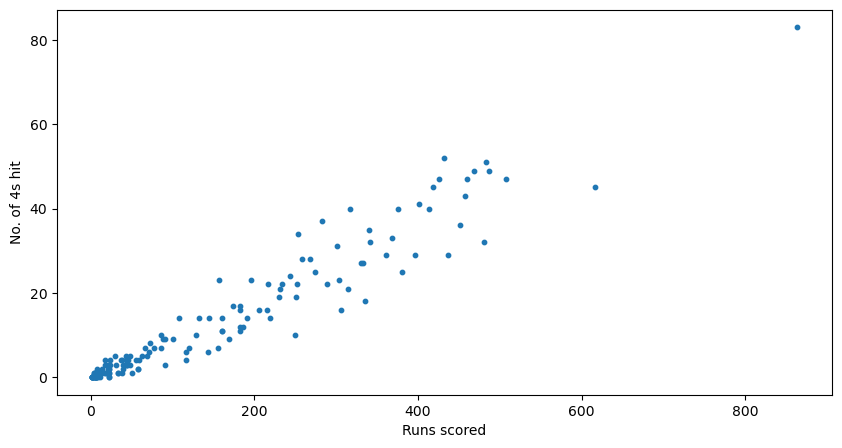

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))

plt.scatter(data.get('Runs'), data.get('4s'), s = 10)
plt.xlabel("Runs scored")
plt.ylabel("No. of 4s hit")
plt.show()


 #### Below graph shows correlation between strike rate of a player and no. of 4s

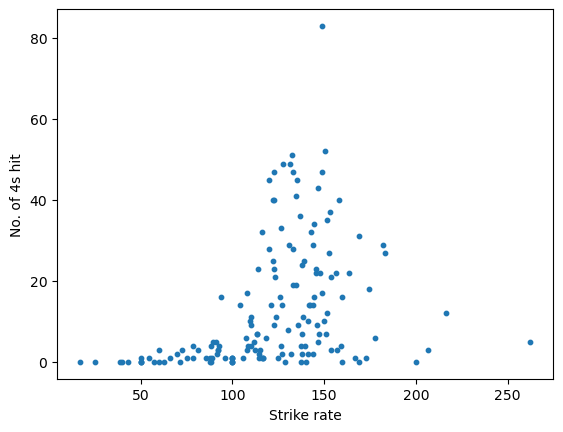

In [21]:
plt.scatter(data.get('SR'), data.get('4s'), s = 10)
plt.xlabel("Strike rate")
plt.ylabel("No. of 4s hit")
plt.show()

#### Creating feature and target variables

In [24]:
#creating feature and target variables
X = data[['Runs', 'Avg', 'SR']]
y = data['4s']
print(X)
print(y)

     Runs    Avg      SR
0     863  57.53  149.05
1     616  51.33  135.38
2     508  36.29  148.97
3     487  44.27  131.26
4     483   34.5  132.32
..    ...    ...     ...
154     2      2  100.00
155     2      1   50.00
156     2      2   40.00
158     2      1   25.00
159     2    0.5   16.66

[154 rows x 3 columns]
0      83
1      45
2      47
3      49
4      51
       ..
154     0
155     0
156     0
158     0
159     0
Name: 4s, Length: 154, dtype: int64


#### Splitting the dataset for training and testing

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Trainging the model and making predictions

In [81]:
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

#### Evaluating model with mean squared error

In [82]:
print('mean_squared_error : ', mean_squared_error(y_test, predictions))

mean_squared_error :  4.406825626225977


#### Logistic regression using Softmax

In [107]:
import numpy as np
four_arr = np.zeros((100))
for num_four in data.get('4s'):
    four_arr[num_four] += 1
print(four_arr)

[23. 20.  8. 11.  9.  5.  3.  5.  1.  4.  3.  3.  2.  0.  6.  0.  4.  2.
  1.  2.  0.  2.  4.  3.  1.  2.  0.  2.  2.  3.  0.  1.  2.  1.  1.  1.
  1.  1.  0.  0.  3.  1.  0.  1.  0.  2.  0.  3.  0.  2.  0.  1.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [110]:
# softmax function on four
def softmax(x):
    return(np.exp(x)/np.exp(x).sum())
print(softmax(four_arr))

[9.52567410e-01 4.74255388e-02 2.91392581e-07 5.85277645e-06
 7.92087158e-07 1.45075824e-08 1.96338777e-09 1.45075824e-08
 2.65715640e-10 5.33704129e-09 1.96338777e-09 1.96338777e-09
 7.22289995e-10 9.77513210e-11 3.94356975e-08 9.77513210e-11
 5.33704129e-09 7.22289995e-10 2.65715640e-10 7.22289995e-10
 9.77513210e-11 7.22289995e-10 5.33704129e-09 1.96338777e-09
 2.65715640e-10 7.22289995e-10 9.77513210e-11 7.22289995e-10
 7.22289995e-10 1.96338777e-09 9.77513210e-11 2.65715640e-10
 7.22289995e-10 2.65715640e-10 2.65715640e-10 2.65715640e-10
 2.65715640e-10 2.65715640e-10 9.77513210e-11 9.77513210e-11
 1.96338777e-09 2.65715640e-10 9.77513210e-11 2.65715640e-10
 9.77513210e-11 7.22289995e-10 9.77513210e-11 1.96338777e-09
 9.77513210e-11 7.22289995e-10 9.77513210e-11 2.65715640e-10
 2.65715640e-10 9.77513210e-11 9.77513210e-11 9.77513210e-11
 9.77513210e-11 9.77513210e-11 9.77513210e-11 9.77513210e-11
 9.77513210e-11 9.77513210e-11 9.77513210e-11 9.77513210e-11
 9.77513210e-11 9.775132